In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
def splitX(Xin):
    # Get values
    N = 3
    M = 5
    npix = 256
    P = N*M # Number of positional values

    # Extract parameters
    xs = Xin[:P].reshape([N, M])
    ys = Xin[P:2*P].reshape([N, M])
    fluxes = Xin[2*P:(2*P)+M]
    BG = Xin[(2*P)+M]
    FF = Xin[-npix**2:].reshape([npix, npix])
    return xs, ys, fluxes, BG, FF

In [3]:
fnames = os.listdir("data_new/")
print(fnames)

['ADAM_Xs_1_500_1.npy', 'ADAM_err_1_500_1.p', 'ADAM_mv_500.p', 'ADAM_Xs_1_500_3.npy', 'ADAM_err_1_500_3.p', 'ADAM_Xs_1_1000_3.npy', 'ADAM_err_1_1000_3.p', 'ADAM_mv_1000.p', 'ADAM_Xs_1_1500_3.npy', 'ADAM_err_1_1500_3.p', 'ADAM_mv_1500.p', 'Xs_true.npy', 'ADAM_Xs_1_2000_3.npy', 'ADAM_err_1_2000_3.p', 'ADAM_mv_2000.p', 'ADAM_Xs_1_2500_3.npy', 'ADAM_err_1_2500_3.p', 'ADAM_mv_2500.p']


In [4]:
ith = 2500
for i in range(len(fnames)):
    if "Xs" in fnames[i] and str(ith) in fnames[i]:
        Xs = np.load("data_new/" + fnames[i])
    if "true" in fnames[i]:
        X_true = np.load("data_new/" + fnames[i])
        
imsum = np.load("imsum.npy")

In [5]:
xs, ys, fluxes, BG, FF = splitX(Xs[300])
xs_true, ys_true, fluxes_true, BG_true, FF_true = splitX(X_true)

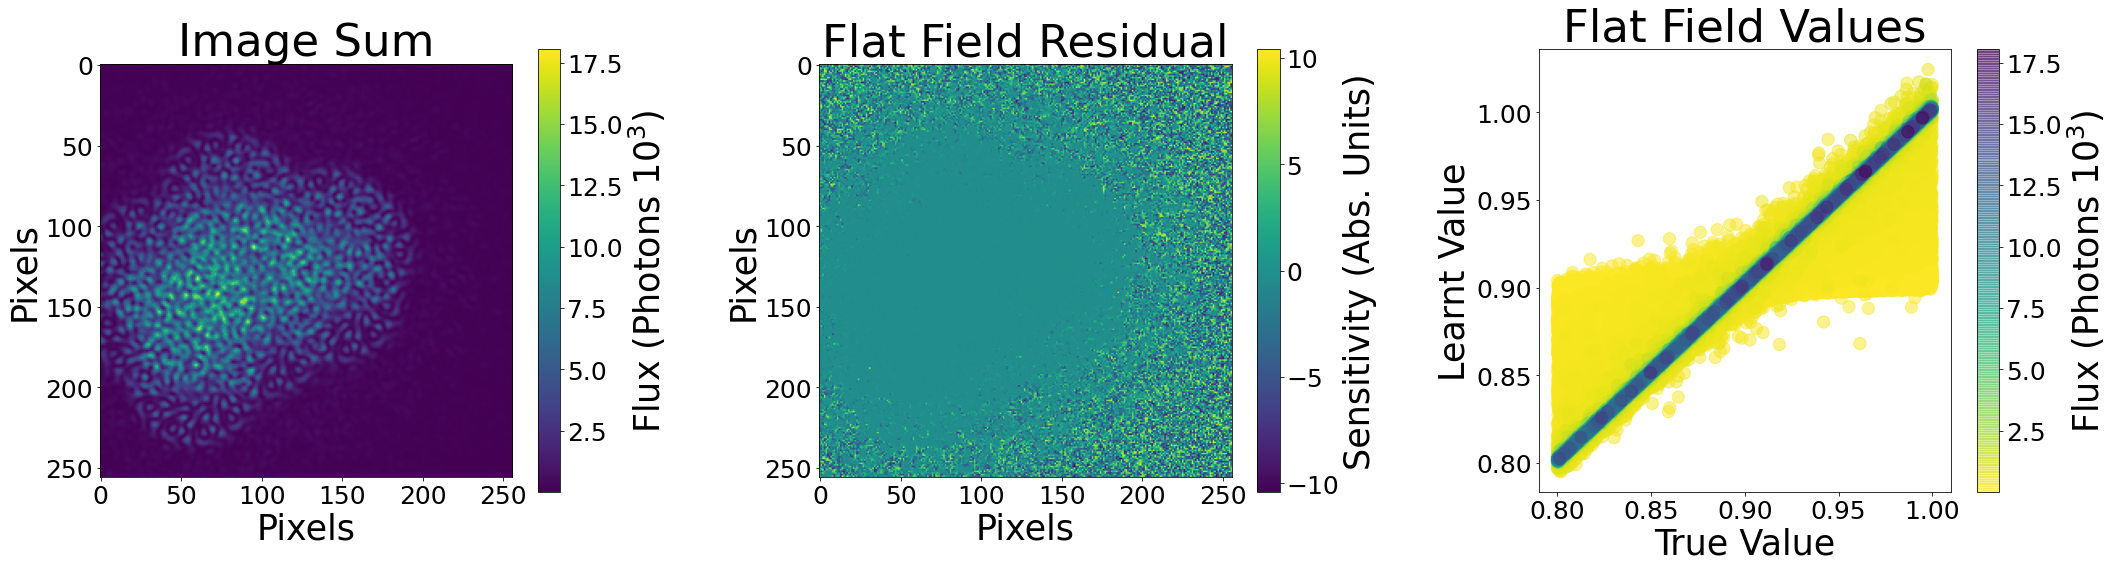

In [6]:
plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
plt.imshow(imsum/1e3)
plt.title("Image Sum", fontsize=45)
cb = plt.colorbar()
cb.set_label("Flux (Photons $10^3$)", fontsize=35)
cb.ax.tick_params(labelsize=25)
plt.xlabel("Pixels", fontsize=35)
plt.ylabel("Pixels", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.subplot(1, 3, 2)
# plt.subplots_adjust(left=-0.5)
scale = 1e2
FFres = FF_true.reshape(FF.shape) - FF
v = scale*np.max(np.abs(FFres))
plt.imshow(scale*FFres, vmin=-v, vmax=v)
plt.title("Flat Field Residual", fontsize=45)
cb = plt.colorbar()
cb.set_label("Sensitivity (Abs. Units)", fontsize=35)
cb.ax.tick_params(labelsize=25)
plt.xlabel("Pixels", fontsize=35)
plt.ylabel("Pixels", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


xs_in = np.linspace(0.8, 1)
colours = imsum.flatten()
FF_T = FF_true.flatten()
FF_F = FF.flatten()
ind = np.argsort(colours)
colours = colours[ind]
FF_T = FF_T[ind]
FF_F = FF_F[ind]

n = len(FF_F)
divs = 5
diver = n//divs
# xpoints = np.linspace(0, n, divs).astype(np.int32)
# xpoints = [0, 1, 2, 3, 4]
# xvals = [0.8, 0.85, 0.9, 0.95, 1]
xpoints = [0.8, 0.85, 0.9, 0.95, 1.]
xvals = ["0.80", "0.85", "0.90", "0.95", "1.00"]

# plt.scatter(FF_true.flatten(), FF.flatten(), c=colours, alpha=1, cmap="YlGnBu")
# plt.scatter(FF_T, FF_F, c=colours, alpha=1, cmap="YlGnBu")
plt.subplot(1, 3, 3)
plt.subplots_adjust(left=0.5)
plt.scatter(FF_T, FF_F, c=colours/1e3, alpha=0.5, cmap="viridis_r", s=150)
cb = plt.colorbar()
cb.set_label("Flux (Photons $10^3$)", fontsize=35)
cb.ax.tick_params(labelsize=25)
# plt.plot(xs_in, xs_in, c='k')
plt.title("Flat Field Values", fontsize=45)
plt.xlabel("True Value", fontsize=35)
plt.ylabel("Learnt Value", fontsize=35)
plt.xticks(xpoints, xvals, fontsize=25)
plt.yticks(fontsize=25)

plt.tight_layout()
plt.savefig("FF")
plt.show()

----

# Now examine all three in the sub-Nyquist case


In [7]:
def splitX(Xin):
    # Get values
    N = 6
    M = 5
    npix = 64
    P = N*M # Number of positional values

    # Extract parameters
    xs = Xin[:P].reshape([N, M])
    ys = Xin[P:2*P].reshape([N, M])
    fluxes = Xin[2*P:(2*P)+M]
    BG = Xin[(2*P)+M]
    FF = Xin[-npix**2:].reshape([npix, npix])
    return xs, ys, fluxes, BG, FF

In [8]:
fnames = os.listdir("data_presentation/")
fnames_airy = os.listdir("data_presentation/Airy")
fnames_diff = os.listdir("data_presentation/Diffuser")
print(fnames)

['Airy', '.ipynb_checkpoints', 'ADAM_Xs_1_250_6.npy', 'ADAM_err_1_250_6.p', 'ADAM_mv_250.p', 'ADAM_Xs_1_500_6.npy', 'ADAM_err_1_500_6.p', 'ADAM_mv_500.p', 'ADAM_Xs_1_750_6.npy', 'ADAM_err_1_750_6.p', 'ADAM_mv_750.p', 'ADAM_Xs_1_1000_6.npy', 'ADAM_err_1_1000_6.p', 'ADAM_mv_1000.p', 'Diffuser', 'Xs_true.npy']


In [9]:
for i in range(len(fnames)):
    if "true" in fnames[i]:
        X_true = np.load("data_presentation/" + fnames[i])

ith = 1000
for i in range(len(fnames)):
    if "Xs" in fnames[i] and str(ith) in fnames[i]:
        tol_Xs = np.load("data_presentation/" + fnames[i])

for i in range(len(fnames_airy)):
    if "Xs" in fnames_airy[i] and str(ith) in fnames_airy[i]:
        airy_Xs = np.load("data_presentation/Airy/" + fnames_airy[i])

for i in range(len(fnames_diff)):
    if "Xs" in fnames_diff[i] and str(ith) in fnames_diff[i]:
        diff_Xs = np.load("data_presentation/Diffuser/" + fnames_diff[i])

In [10]:
flux_true = splitX(X_true)[2]
Xs_in = [tol_Xs, airy_Xs, diff_Xs]

RMSEs = []
for i in range(ith):
    RMSE = []
    for j in range(len(Xs_in)):
        flux = splitX(Xs_in[j][i])[2]
        RMSE.append(np.sqrt(np.average(np.square(flux-flux_true))))
    RMSEs.append(RMSE)
RMSEs = np.array(RMSEs).T

In [11]:
RMSEs.T.shape

(1000, 3)

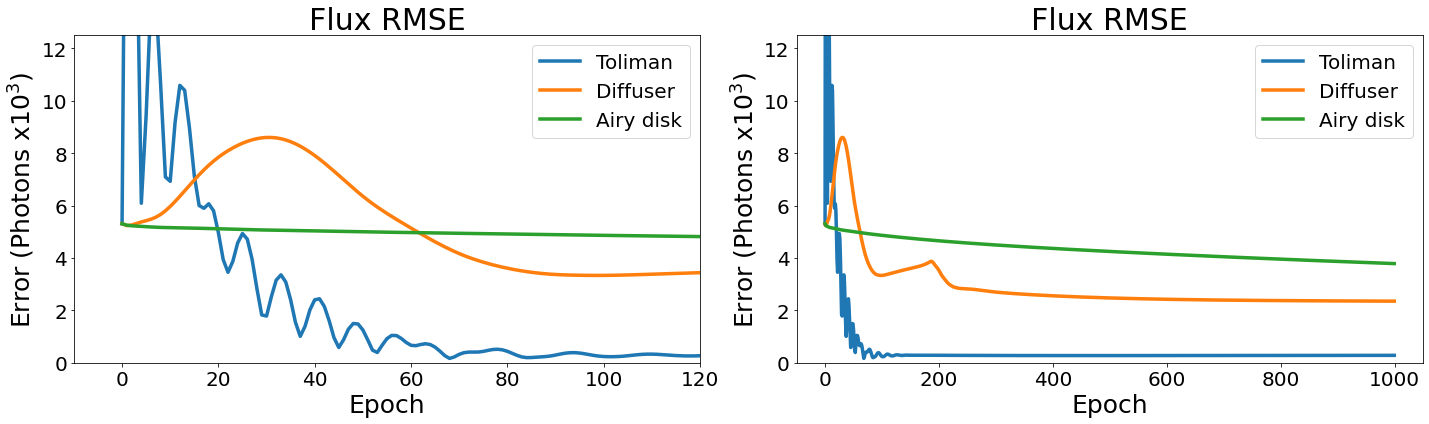

In [12]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(RMSEs[0]/1e3, linewidth=3.5, label="Toliman")
plt.plot(RMSEs[1]/1e3, linewidth=3.5, label="Diffuser")
plt.plot(RMSEs[2]/1e3, linewidth=3.5, label="Airy disk")
plt.xlabel("Epoch", fontsize=25)
plt.ylabel("Error (Photons x$10^3$)", fontsize=25)
plt.title("Flux RMSE", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 12.5)
plt.xlim(-10, 120)

plt.subplot(1, 2, 2)
plt.plot(RMSEs[0]/1e3, linewidth=3.5, label="Toliman")
plt.plot(RMSEs[1]/1e3, linewidth=3.5, label="Diffuser")
plt.plot(RMSEs[2]/1e3, linewidth=3.5, label="Airy disk")
plt.xlabel("Epoch", fontsize=25)
plt.ylabel("Error (Photons x$10^3$)", fontsize=25)
plt.title("Flux RMSE", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 12.5)

plt.tight_layout()
plt.savefig("FF_limited")

In [9]:
# ith = 1000
# for i in range(len(fnames)):
#     if "err" in fnames[i] and str(ith) in fnames[i]:
#         tol = pickle.load(open("data_presentation/" + fnames[i], 'rb'))
        
# for i in range(len(fnames_airy)):
#     if "err" in fnames_airy[i] and str(ith) in fnames_airy[i]:
#         airy = pickle.load(open("data_presentation/Airy/" + fnames_airy[i], 'rb'))
        
# for i in range(len(fnames_diff)):
#     if "err" in fnames_diff[i] and str(ith) in fnames_diff[i]:
#         diff = pickle.load(open("data_presentation/Diffuser/" + fnames_diff[i], 'rb'))

In [14]:
epochs = 1000
tol_err = np.array(tol["Ferr"])[:epochs]
airy_err = np.array(airy["Ferr"])[:epochs]
diff_err = np.array(diff["Ferr"])[:epochs]

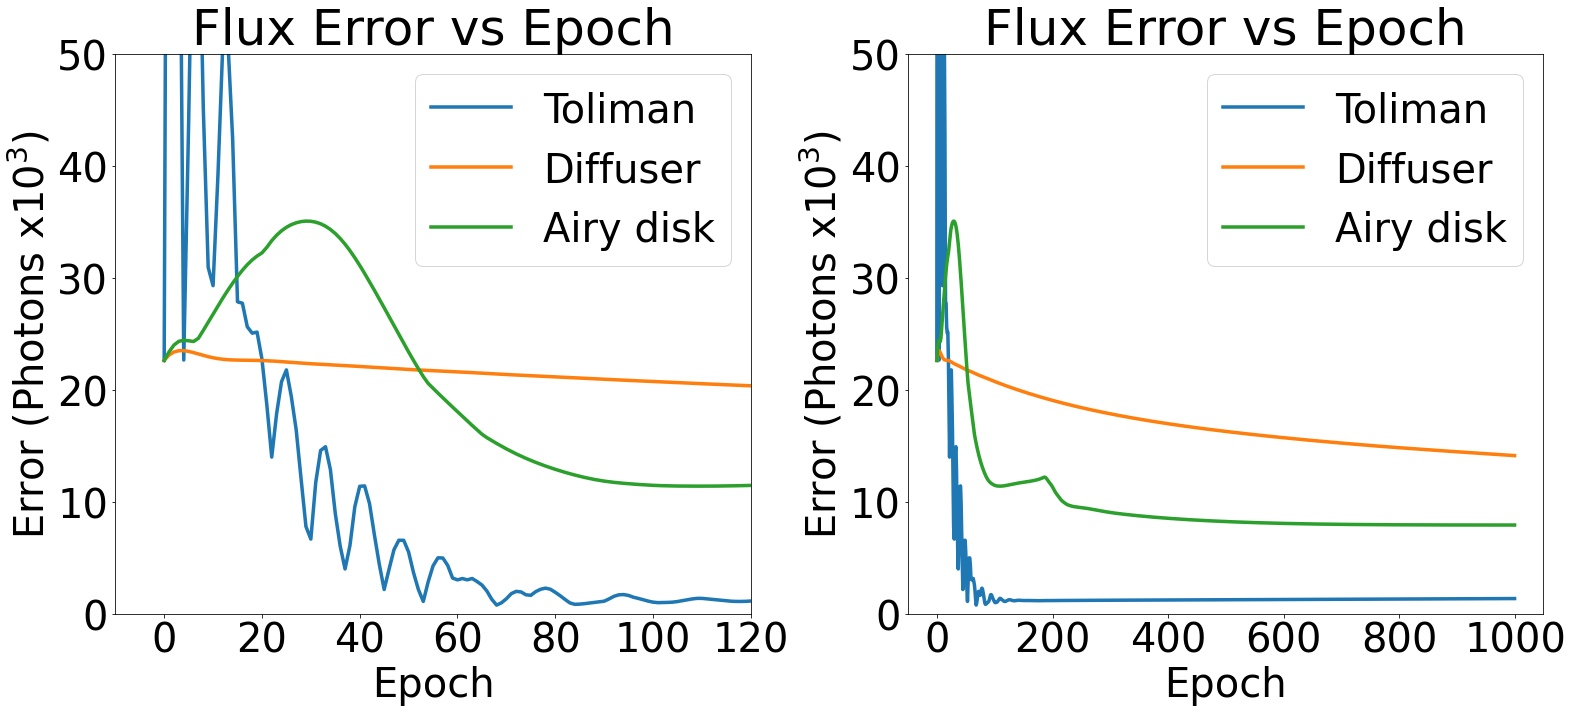

In [16]:
plt.figure(figsize=(22, 10))

plt.subplot(1, 2, 1)
plt.plot(tol_err/1e3, linewidth=3.5, label="Toliman")
plt.plot(diff_err/1e3, linewidth=3.5, label="Diffuser")
plt.plot(airy_err/1e3, linewidth=3.5, label="Airy disk")
plt.xlabel("Epoch", fontsize=40)
plt.ylabel("Error (Photons x$10^3$)", fontsize=40)
plt.title("Flux Error vs Epoch", fontsize=50)
plt.legend(fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylim(0, 50)
plt.xlim(-10, 120)

plt.subplot(1, 2, 2)
plt.plot(tol_err/1e3, linewidth=3.5, label="Toliman")
plt.plot(diff_err/1e3, linewidth=3.5, label="Diffuser")
plt.plot(airy_err/1e3, linewidth=3.5, label="Airy disk")
plt.xlabel("Epoch", fontsize=40)
plt.ylabel("Error (Photons x$10^3$)", fontsize=40)
plt.title("Flux Error vs Epoch", fontsize=50)
plt.legend(fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylim(0, 50)

plt.tight_layout()
plt.savefig("FF_limited")

In [12]:
epochs = 1000
tol_err = np.array(tol["FPerr_avg"])[:epochs]
airy_err = np.array(airy["FPerr_avg"])[:epochs]
diff_err = np.array(diff["FPerr_avg"])[:epochs]

In [13]:
plt.figure(figsize=(20, 10))


# plt.plot(np.log10(tol_err), linewidth=3.5, label="Toliman")
# plt.plot(np.log10(diff_err), linewidth=3.5, label="Diffuser")
# plt.plot(np.log10(airy_err), linewidth=3.5, label="Airy disk")
plt.plot(np.log10tol_err, linewidth=3.5, label="Toliman")
plt.plot(np.log10diff_err, linewidth=3.5, label="Diffuser")
plt.plot(np.log10airy_err, linewidth=3.5, label="Airy disk")
# plt.xlabel("Epoch", fontsize=40)
# plt.ylabel("Error (Photons x$10^3$)", fontsize=40)
# plt.title("Flux Error vs Epoch", fontsize=50)
plt.legend(fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# plt.ylim(0, 50)

plt.tight_layout()
# plt.savefig("FF_limited")

AttributeError: module 'numpy' has no attribute 'log10tol_err'

<Figure size 1440x720 with 0 Axes>